**In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.**

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

student = pd.read_csv("data/StudentsPerformance.csv")
display(student)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
student["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

**1 - Does the performance in the exams vary according to gender, origin and education level of parents?**

In [4]:
lst = []
for x in range(student.shape[0]):
    lst.append(student["math score"].iloc[x]/3+student["reading score"].iloc[x]/3+student["writing score"].iloc[x]/3)
student["avg_score"] = lst
lst2 = []
for x in range(student.shape[0]):
    if student.avg_score.iloc[x] >= 85:
        lst2.append("A")
    elif (student.avg_score.iloc[x] >= 70) and (student.avg_score.iloc[x] < 85):
        lst2.append("B")
    elif (student.avg_score.iloc[x] < 70) and (student.avg_score.iloc[x] >= 55):
        lst2.append("C")
    elif(student.avg_score.iloc[x] >= 35) and (student.avg_score.iloc[x] < 55):
        lst2.append("D")
    else:
        lst2.append("F")
student["score_level"] = lst2

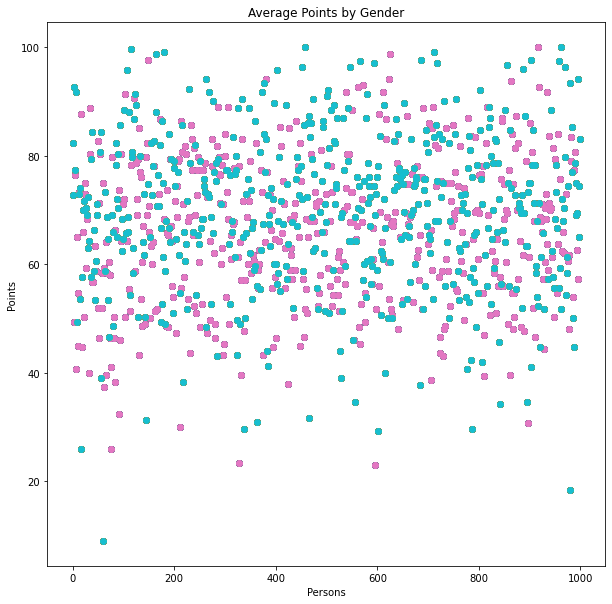

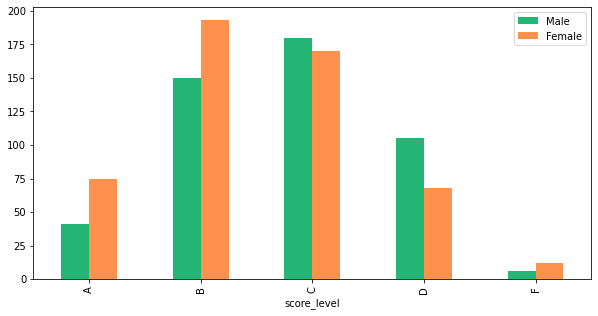

In [5]:

pd.options.display.float_format = '{:.3f}'.format
plt.figure(figsize = (10,10))
plt.title("Average Points by Gender")
plt.xlabel("Persons")
plt.ylabel("Points")
for fm in student.gender:
    plt.scatter(x = student[student.gender == fm].index , y = student[student.gender == fm].avg_score , label = fm)


df_f = student.groupby(student.score_level.iloc[student[student.gender == "female"].index]).gender.count()
df_m = student.groupby(student.score_level.iloc[student[student.gender == "male"].index]).gender.count()
lst = []
ind = df_f.index

lst1 = []
for x in range(len(df_m)):
    lst.append(df_m[x])
    lst1.append(df_f[x])
dat = pd.DataFrame(index=ind)
dat["Male"] = lst
dat["Female"] = lst1

dat.plot(kind='bar', figsize = (10,5), color = ["#22B573", "#FF914D"])
plt.show()

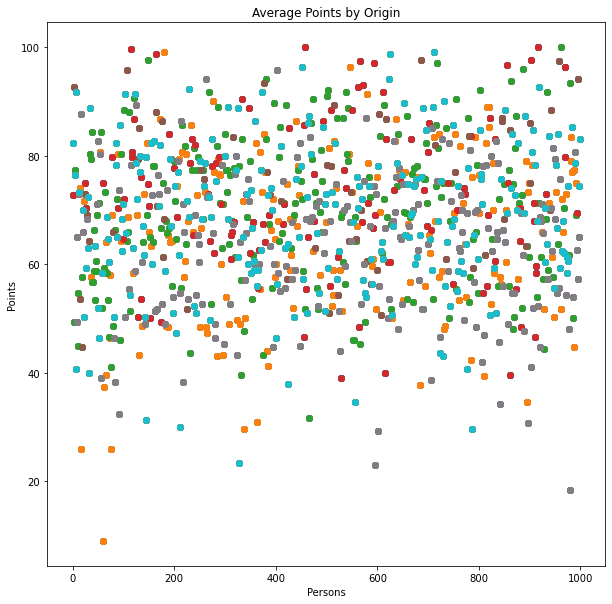

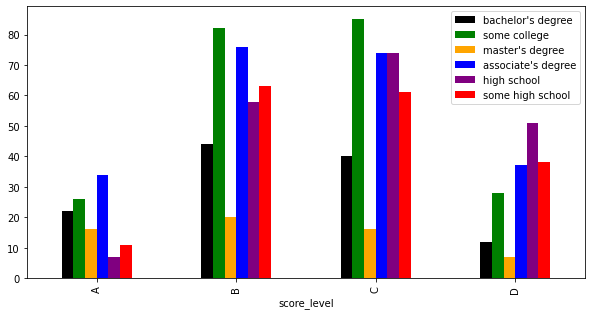

In [22]:
plt.figure(figsize = (10,10))
plt.title("Average Points by Origin")
plt.xlabel("Persons")
plt.ylabel("Points")
for fm in student["parental level of education"]:
    plt.scatter(x = student[student["parental level of education"] == fm].index , y = student[student["parental level of education"] == fm].avg_score , label = fm)


df_bachelor = student.groupby(student.score_level.iloc[student[student["parental level of education"] == "bachelor's degree"].index])["parental level of education"].count()
df_some_c = student.groupby(student.score_level.iloc[student[student["parental level of education"] == 'some college'].index])["parental level of education"].count()
df_master = student.groupby(student.score_level.iloc[student[student["parental level of education"] == "master's degree"].index])["parental level of education"].count()
df_associate = student.groupby(student.score_level.iloc[student[student["parental level of education"] == "associate's degree"].index])["parental level of education"].count()
df_high = student.groupby(student.score_level.iloc[student[student["parental level of education"] == 'high school'].index])["parental level of education"].count()
df_some_h = student.groupby(student.score_level.iloc[student[student["parental level of education"] == 'some high school'].index])["parental level of education"].count()
ind = df_bachelor.index
lst_bachelor = []
lst_some_c= []
lst_master = []
lst_associate = []
lst_high = []
lst_some_h =[]
for x in range(len(df_bachelor)):
    lst_bachelor.append(df_bachelor[x])
    lst_some_c.append(df_some_c[x])
    lst_master.append(df_master[x])
    lst_associate.append(df_associate[x])
    lst_high.append(df_high[x])
    lst_some_h.append(df_some_h[x])
    
dat_origin = pd.DataFrame(index=ind)
dat_origin["bachelor's degree"] = lst_bachelor
dat_origin['some college'] = lst_some_c
dat_origin["master's degree"] = lst_master
dat_origin["associate's degree"] = lst_associate
dat_origin['high school'] = lst_high
dat_origin['some high school'] = lst_some_h

dat_origin.plot(kind='bar', figsize = (10,5), color = ["black", "green","orange","blue","purple","red"])
plt.show()

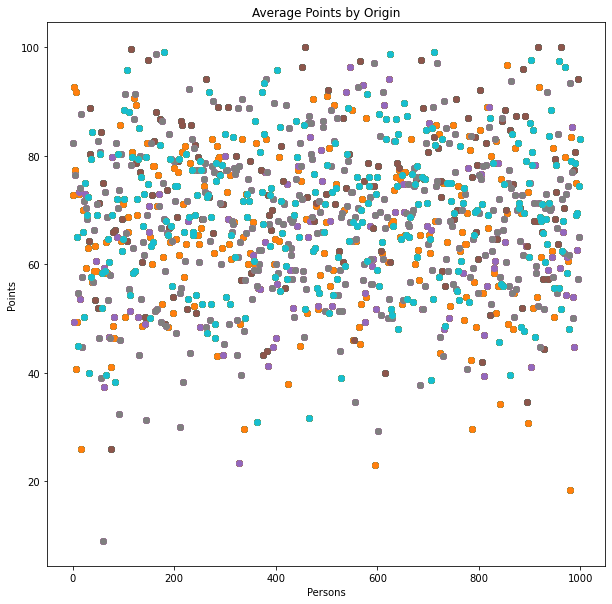

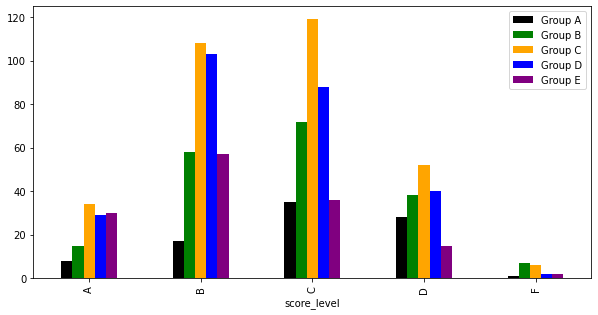

In [18]:
plt.figure(figsize = (10,10))
plt.title("Average Points by Origin")
plt.xlabel("Persons")
plt.ylabel("Points")
for fm in student["race/ethnicity"]:
    plt.scatter(x = student[student["race/ethnicity"] == fm].index , y = student[student["race/ethnicity"] == fm].avg_score , label = fm)


df_a = student.groupby(student.score_level.iloc[student[student["race/ethnicity"] == 'group A'].index])["race/ethnicity"].count()
df_b = student.groupby(student.score_level.iloc[student[student["race/ethnicity"] == 'group B'].index])["race/ethnicity"].count()
df_c = student.groupby(student.score_level.iloc[student[student["race/ethnicity"] == 'group C'].index])["race/ethnicity"].count()
df_d = student.groupby(student.score_level.iloc[student[student["race/ethnicity"] == 'group D'].index])["race/ethnicity"].count()
df_e = student.groupby(student.score_level.iloc[student[student["race/ethnicity"] == 'group E'].index])["race/ethnicity"].count()
ind = df_a.index
lst_a = []
lst_b= []
lst_c = []
lst_d = []
lst_e = []

for x in range(len(df_a)):
    lst_a.append(df_a[x])
    lst_b.append(df_b[x])
    lst_c.append(df_c[x])
    lst_d.append(df_d[x])
    lst_e.append(df_e[x])
    
dat_origin = pd.DataFrame(index=ind)
dat_origin["Group A"] = lst_a
dat_origin["Group B"] = lst_b
dat_origin["Group C"] = lst_c
dat_origin["Group D"] = lst_d
dat_origin["Group E"] = lst_e


dat_origin.plot(kind='bar', figsize = (10,5), color = ["black", "green","orange","blue","purple"])
plt.show()

**2 - Does lunch type have a relationship with exam performances? How can you explain this, if any?**

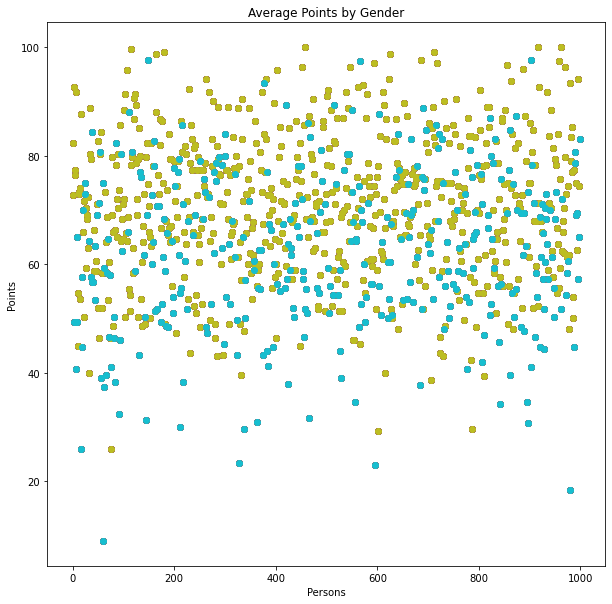

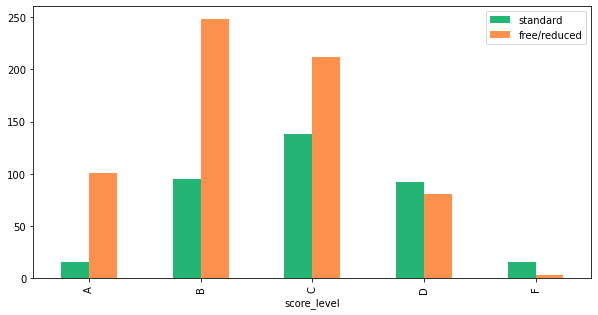

In [9]:

plt.figure(figsize = (10,10))
plt.title("Average Points by Lunch")
plt.xlabel("Persons")
plt.ylabel("Points")
for fm in student.lunch:
    plt.scatter(x = student[student.lunch == fm].index , y = student[student.lunch == fm].avg_score , label = fm)


df_f = student.groupby(student.score_level.iloc[student[student.lunch == "standard"].index]).lunch.count()
df_m = student.groupby(student.score_level.iloc[student[student.lunch == "free/reduced"].index]).lunch.count()
lst = []
ind = df_f.index

lst1 = []
for x in range(len(df_m)):
    lst.append(df_m[x])
    lst1.append(df_f[x])
dat = pd.DataFrame(index=ind)
dat["standard"] = lst
dat["free/reduced"] = lst1

dat.plot(kind='bar', figsize = (10,5), color = ["#22B573", "#FF914D"])
plt.show()

Free meals may be given to students with high grades or We can say eating meal free effects positive them.

**3 - Does the preparation courses have an impact on exam performance?**

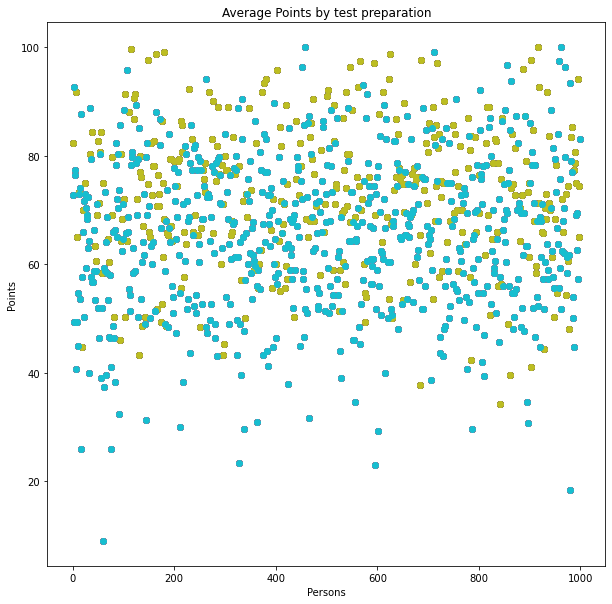

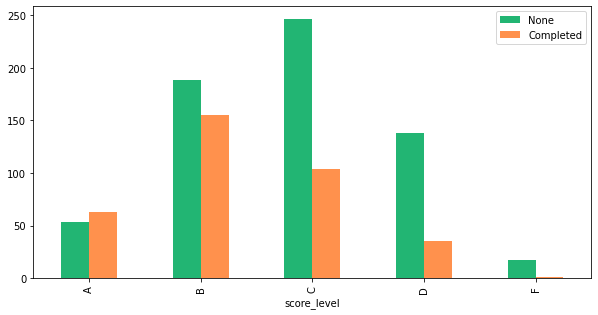

In [27]:

pd.options.display.float_format = '{:.3f}'.format
plt.figure(figsize = (10,10))
plt.title("Average Points by test preparation")
plt.xlabel("Persons")
plt.ylabel("Points")
for fm in student["test preparation course"]:
    plt.scatter(x = student[student["test preparation course"] == fm].index , y = student[student["test preparation course"] == fm].avg_score , label = fm)


df_none = student.groupby(student.score_level.iloc[student[student["test preparation course"] == "none"].index])["test preparation course"].count()
df_comp = student.groupby(student.score_level.iloc[student[student["test preparation course"] == "completed"].index])["test preparation course"].count()
lst_none = []
ind = df_none.index

lst_comp = []
for x in range(len(df_none)):
    lst_none.append(df_none[x])
    lst_comp.append(df_comp[x])
    
dat = pd.DataFrame(index=ind)
dat["None"] = lst_none
dat["Completed"] = lst_comp

dat.plot(kind='bar', figsize = (10,5), color = ["#22B573", "#FF914D"])
plt.show()

4 - Which lessons are most correlated with each other?

In [28]:
student.corr()

,math score,reading score,writing score,avg_score
math score,1.000,0.818,0.803,0.919
reading score,0.818,1.000,0.955,0.970
writing score,0.803,0.955,1.000,0.966
avg_score,0.919,0.970,0.966,1.000


Writing and reading scores are most correlated with each other.